<a href="https://colab.research.google.com/github/sarthakkaushik/Cdiscount-Image-Classification/blob/main/Cdiscount_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Data from Google Drive

In [2]:
# Code to mount google drive in case you are loading the data from your google drive
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [3]:
data_path = '/gdrive/MyDrive/UOH Assignment Dataset/cdiscount'

In [4]:
import os 
os.chdir(data_path)
print(os.getcwd())

/gdrive/MyDrive/UOH Assignment Dataset/cdiscount


Importing libraries

In [5]:
# !pip install Pillow
import numpy as np
import pandas as pd
import io
import bson
import matplotlib.pyplot as plt
from imageio import imread
from tqdm import tqdm_notebook

In [92]:
import os, sys, math, io
import numpy as np
import pandas as pd
import multiprocessing as mp
import bson
import struct

%matplotlib inline
import matplotlib.pyplot as plt

import keras
from keras.preprocessing.image import load_img, img_to_array
import tensorflow as tf

from collections import defaultdict
from tqdm import *

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../cdiscount"]).decode("utf8"))
# Any results you write to the current directory are saved as output.
from PIL import Image

categories.csv
category_names.csv
file.h5
sample_submission.csv
test.bson
train.bson
train_example.bson
train_images.csv
train_offsets.csv
val_images.csv



#Exploring the category_names.csv table

In [22]:
data_dir = "../cdiscount/"

train_bson_path = os.path.join(data_dir, "category_names.csv")

In [23]:
# categories_df = pd.read_csv(train_bson_path, index_col='category_id')
categories_df = pd.read_csv(train_bson_path)

In [24]:
categories_df.head()

,category_id,category_level1,category_level2,category_level3
0,1000021794,ABONNEMENT / SERVICES,CARTE PREPAYEE,CARTE PREPAYEE MULTIMEDIA
1,1000012764,AMENAGEMENT URBAIN - VOIRIE,AMENAGEMENT URBAIN,ABRI FUMEUR
2,1000012776,AMENAGEMENT URBAIN - VOIRIE,AMENAGEMENT URBAIN,ABRI VELO - ABRI MOTO
3,1000012768,AMENAGEMENT URBAIN - VOIRIE,AMENAGEMENT URBAIN,FONTAINE A EAU
4,1000012755,AMENAGEMENT URBAIN - VOIRIE,SIGNALETIQUE,PANNEAU D'INFORMATION EXTERIEUR


In [115]:
"""
Let's inspect categories and their relationship to images. We have

5270 unique categories
49 unique level 1 categories
483 unique level 2 categories
5263 unique level 3 categories

"""

print("Unique categories: ", len(categories_df['category_id'].unique()))
print("Unique level 1 categories: ", len(categories_df['category_level1'].unique()))
print("Unique level 2 categories: ", len(categories_df['category_level2'].unique()))
print("Unique level 3 categories: ", len(categories_df['category_level3'].unique()))

Unique categories:  5270
Unique level 1 categories:  49
Unique level 2 categories:  483
Unique level 3 categories:  5263


Observation 1 :- category level3 has near about same uniuqe value as category id

In [26]:
#let's dig deep and see do we observe any observation between category id and category 3

gb_obj = categories_df.groupby('category_level3')
gb_cnt = gb_obj.count()
# print(cnt)
print('No of rows with one-one mapping between category_id and Category 3 - ',len(gb_cnt[gb_cnt['category_id'] ==1]))
print('No of rows with more than one category_id for a given Category 3 - ',len(gb_cnt[gb_cnt['category_id'] >1]))
print(gb_cnt[gb_cnt['category_id'] >1])

No of rows with one-one mapping between category_id and Category 3 -  5256
No of rows with more than one category_id for a given Category 3 -  7
                                    category_id  ...  category_level2
category_level3                                  ...                 
CONFORT URINAIRE                              2  ...                2
FONTAINE A EAU                                2  ...                2
FUSIBLE                                       2  ...                2
GUIDON                                        2  ...                2
PELUCHE                                       2  ...                2
PROTEGE ECRAN - FILM DE PROTECTION            2  ...                2
VOITURE                                       2  ...                2

[7 rows x 3 columns]


In [114]:
#lets see one example of Category level 3 with more than 1 category_id
gb_obj.get_group(gb_cnt[gb_cnt['category_id'] > 1].index.values[2])


,category_id,category_level1,category_level2,category_level3
1149,1000006131,BRICOLAGE - OUTILLAGE - QUINCAILLERIE,ELECTRICITE - DOMOTIQUE,FUSIBLE
2156,1000013353,ELECTRONIQUE,COMPOSANTS OPTOELECTRONIQUES,FUSIBLE


Observation 2 :- 

1.   Total Unique level 3 categories:  5263 
2.   One-One mapping between category_id and level 3 categories : 5256
3.   Category level 3 with more than 1 category_id : 7


            

In [28]:
#Visualizing Top 15 Categories of Catergories level1 and level2

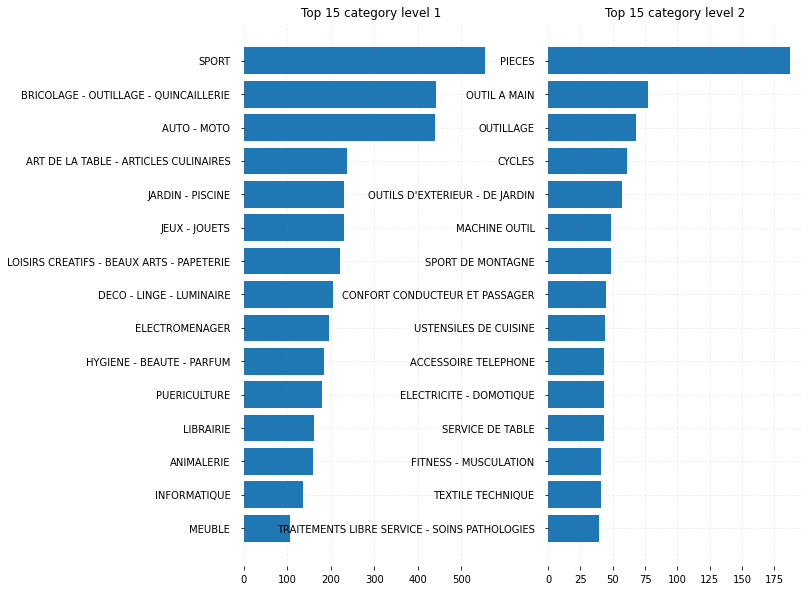

In [29]:
col_name=['category_level1', 'category_level2']
fig, ax = plt.subplots(1,2,figsize =(10, 10))
ax = ax.flatten()
ax[0].set_title('Top 15 category level 1')
ax[1].set_title('Top 15 category level 2')




for i, cat in enumerate(col_name):

    # print('index=', i, 'category=', cat)
    cat1_count = categories_df[cat].value_counts().to_frame().reset_index()
    name_cat1 = cat1_count['index'].head(15)
    count_cat1 = cat1_count[cat].head(15)

    # Figure Size
    # fig, ax = plt.subplots(2,2,figsize =(16, 16))
    # because ax will be a 2D array an we are converting into 1D array
    # Add padding between axes and labels
    ax[i].xaxis.set_tick_params(pad=5)
    ax[i].yaxis.set_tick_params(pad=10)

    # Horizontal Bar Plot
    ax[i].barh(name_cat1, count_cat1)

    # Remove axes splines
    for s in ['top', 'bottom', 'left', 'right']:
        ax[i].spines[s].set_visible(False)

    # Add x, y gridlines
    ax[i].grid(b=True, color='grey', linestyle='-.',
                 linewidth=0.5, alpha=0.2)

    # Show top values
    ax[i].invert_yaxis()

    # # # Add Text watermark
    # # fig.text(0.9, 0.15, 'Sarthak Kaushik', fontsize = 12,
    # #          color ='grey', ha ='right', va ='bottom',
    # #          alpha = 0.7)

    # #Add annotation to bars
    # for i in ax[i].patches:
    #     plt.text(i.get_width()+0.2, i.get_y()+0.5,
    #              str(round((i.get_width()), 2)),
    #              fontsize = 10, fontweight ='bold',
    #              color ='grey')

    # Add Plot Title
    # print("type-",type(cat),cat)
    # ax[i].set_title('Top 5 ',cat, loc='center', )

    
 

#Exploring Train_example BSON File

In [93]:
# read bson file into pandas DataFrame
data_dir = "../cdiscount/"
train_example_bson_path = os.path.join(data_dir, "train_example.bson")
with open(train_example_bson_path,'rb') as b:
    df_example = pd.DataFrame(bson.decode_all(b.read()))
    
# convert binary image to raw image and store in the imgs column
df_example['imgs'] = df_example['imgs'].apply(lambda rec: rec[0]['picture'])
df_example['imgs'] = df_example['imgs'].apply(lambda img: Image.open(io.BytesIO(img)))

In [126]:
df_example.head()

,_id,imgs,category_id
0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1000010653
1,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1000010653
2,2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1000004079
3,3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1000004141
4,4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,1000015539


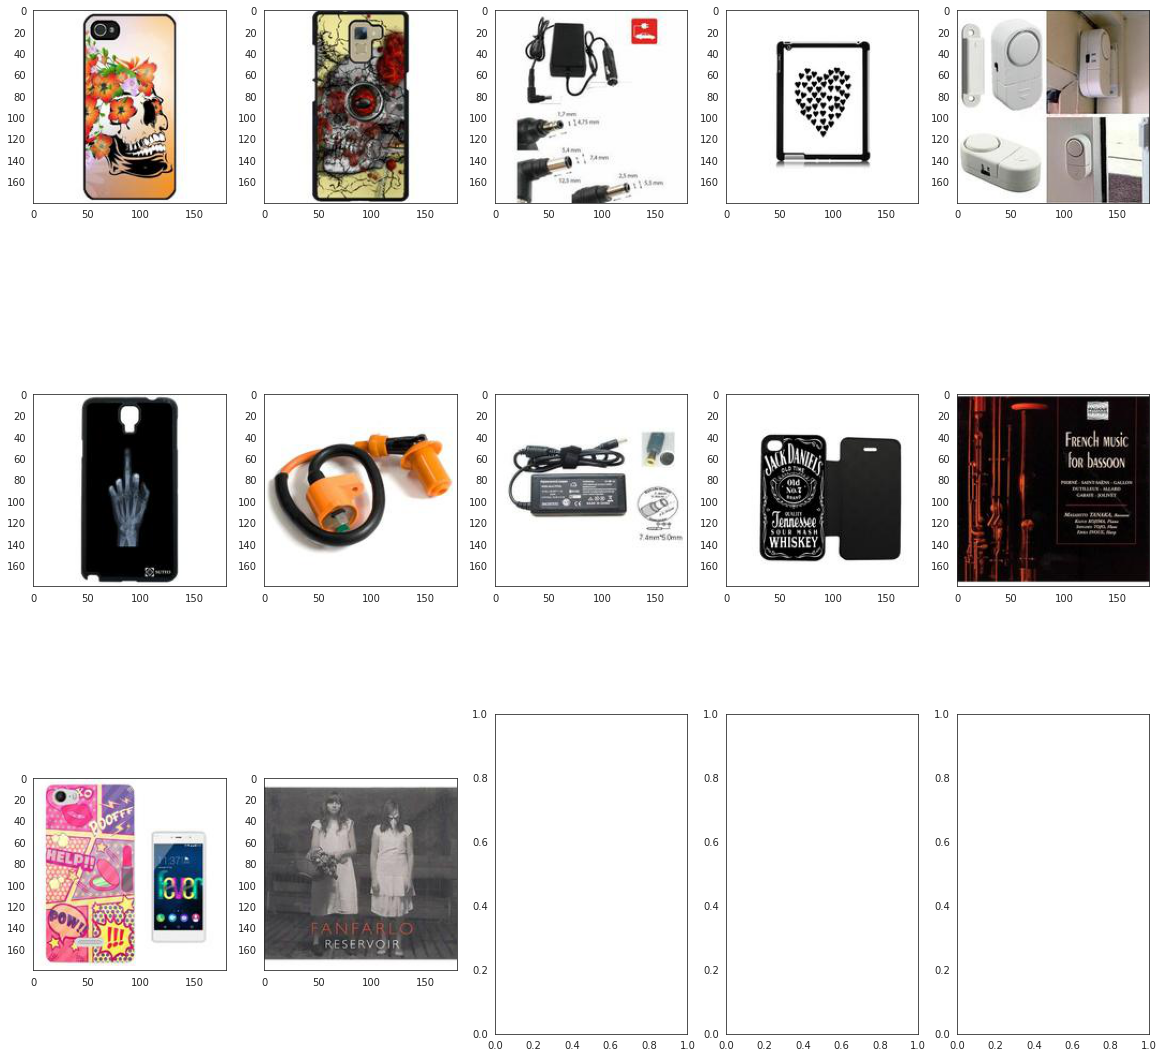

In [121]:
rows, cols = 3, 5

with open(train_example_bson_path, 'rb') as f:
    data = bson.decode_file_iter(f)

    fig, ax = plt.subplots(rows, cols, figsize=(20, 20))
    ax = ax.flatten()

    i = 0
    for c, d in enumerate(data):
      if i<12:
        product_id = d['_id']
        category_id = d['category_id']
        for e, pic in enumerate(d['imgs']):
          picture = imread(io.BytesIO(pic['picture']))
          ax[i].imshow(picture)
          i = i + 1
      else:
        break

            
   

    # except IndexError:
    #     plt.tight_layout()

#Exploring Train.bson File

In [8]:
data_dir = "../cdiscount/"
train_bson_path = os.path.join(data_dir, "train.bson")
# test_bson_path = os.path.join(data_dir, "test.bson")


In [9]:
prod_id = []
prod_category = []
prod_num_imgs = []
prod_imgs=[]

num_dicts = 7069896 # according to data page

# This will take about 02m15s to complete
with open(train_bson_path, 'rb') as f, tqdm_notebook(total=num_dicts) as bar:
        
    data = bson.decode_file_iter(f)
    i=0
    for c, d in enumerate(data):
        bar.update()
        prod_id.append(d['_id'])
        prod_category.append(d['category_id'])
        prod_num_imgs.append(len(d['imgs']))
        # print(d['imgs'])
        # img_ls=[]
        # for e, pic in enumerate(d['imgs']):
        #   print(pic)
          # img_ls.append(pic['picture'].apply(lambda rec: rec[0]['picture']))
        # prod_imgs.append(img_ls)
               
        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':


  0%|          | 0/7069896 [00:00<?, ?it/s]

In [43]:
#Create the dataframe
df_dict = {
    'category_id': prod_category,
    '_id': prod_id,
    'num_imgs': prod_num_imgs
}# we are not loading images as it will take lot of memory 
df = pd.DataFrame(df_dict)
del df_dict # Free memory

In [44]:
df.head()

,category_id,_id,num_imgs
0,1000010653,0,1
1,1000010653,1,1
2,1000004079,2,1
3,1000004141,3,1
4,1000015539,4,1


In [57]:
# Now merging  df with category table to creat 'train' table

train = df.merge(categories_df,on='category_id')
train.head()


,category_id,_id,num_imgs,category_level1,category_level2,category_level3
0,1000010653,0,1,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE TELEPHONE - BUMPER TELEPHONE
1,1000010653,1,1,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE TELEPHONE - BUMPER TELEPHONE
2,1000010653,5,1,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE TELEPHONE - BUMPER TELEPHONE
3,1000010653,11,1,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE TELEPHONE - BUMPER TELEPHONE
4,1000010653,16,1,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE TELEPHONE - BUMPER TELEPHONE


In [58]:
train.shape

(7069896, 6)

In [72]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7069896 entries, 0 to 7069895
Data columns (total 6 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   category_id      int64 
 1   _id              int64 
 2   num_imgs         int64 
 3   category_level1  object
 4   category_level2  object
 5   category_level3  object
dtypes: int64(3), object(3)
memory usage: 377.6+ MB


In [159]:
#No of Unique products_id and Category_id
print("Unique product_id: ", len(train['_id'].unique()))
print("Unique categories: ", len(train['category_id'].unique()))

# So we have same unique category id in both train and Category file.

Unique product_id:  7069896
Unique categories:  5270


In [161]:
# Number of Image Per Category

train['num_imgs'].value_counts()

1    4369441
2    1128588
4    1029075
3     542792
Name: num_imgs, dtype: int64

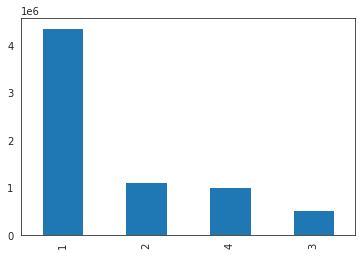

In [158]:
train.num_imgs.value_counts().plot(kind='bar');#Most of the product has only 1 images

In [156]:
# Let's see the top 15 most common category from the category table:


# train.shape

,category_id,_id,num_imgs,category_level1,category_level2,category_level3
0,1000010653,0,1,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE TELEPHONE - BUMPER TELEPHONE
1,1000010653,1,1,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE TELEPHONE - BUMPER TELEPHONE
2,1000010653,5,1,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE TELEPHONE - BUMPER TELEPHONE
3,1000010653,11,1,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE TELEPHONE - BUMPER TELEPHONE
4,1000010653,16,1,TELEPHONIE - GPS,ACCESSOIRE TELEPHONE,COQUE TELEPHONE - BUMPER TELEPHONE


In [153]:
temp=df['category_id'].value_counts().to_frame().head(15).reset_index()
temp.columns=['category_id','counts']
# temp.head()
# temp['category_id'].to_list()
categories_df[categories_df['category_id'].isin(temp['category_id'].to_list())]

,category_id,category_level1,category_level2,category_level3
515,1000005509,AUTO - MOTO,CONFORT CONDUCTEUR ET PASSAGER,PERSONNALISATION VEHICULE - DECORATION VEHICULE
2501,1000015912,INFORMATIQUE,COMPOSANT - PIECE DETACHEE,CLAVIER (PIECE DETACHEE)
2503,1000008094,INFORMATIQUE,COMPOSANT - PIECE DETACHEE,DALLE D'ECRAN
2522,1000004085,INFORMATIQUE,CONNECTIQUE - ALIMENTATION,BATTERIE D'ALIMENTATION INFORMATIQUE
2530,1000004079,INFORMATIQUE,CONNECTIQUE - ALIMENTATION,CHARGEUR - ADAPTATEUR SECTEUR - ALLUME CIGARE ...
2548,1000011427,INFORMATIQUE,IMPRESSION - SCANNER,CARTOUCHE IMPRIMANTE
2560,1000011423,INFORMATIQUE,IMPRESSION - SCANNER,TONER - RECUPERATEUR DE TONER
3253,1000015309,LIBRAIRIE,AUTRES LIVRES,AUTRES LIVRES
3335,1000014202,LIBRAIRIE,LITTERATURE,LITTERATURE FRANCAISE
3956,1000018290,MUSIQUE,CD,CD MUSIQUE CLASSIQUE


In [154]:
# 'Let's see the least 15 most common category from the category table'

temp=df['category_id'].value_counts().to_frame().tail(15).reset_index()
temp.columns=['category_id','counts']
categories_df[categories_df['category_id'].isin(temp['category_id'].to_list())]

,category_id,category_level1,category_level2,category_level3
981,1000022465,BATEAU MOTEUR - VOILIER,ELECTRICITE,CONVERTISSEUR DE TENSION
1535,1000015609,CHAUSSURES - ACCESSOIRES,ACCESSOIRES CHAUSSURES,ESSUIE-BOTTES - LAVE-BOTTES
2241,1000000896,EPICERIE,CONSERVE DE LEGUME,POIVRON EN CONSERVE
3452,1000014467,LOISIRS CREATIFS - BEAUX ARTS - PAPETERIE,COLLECTION - PHILATELIE - CARTOPHILIE - NUMISM...,TROUSSE D'EXPERTISE - PACK MULTI-OUTILS
3667,1000015046,MATERIEL DE BUREAU,MATERIEL PEDAGOGIQUE,REGISTRE D'APPEL - CAHIER DE CLASSE
3711,1000011519,MATERIEL MEDICAL,ACUPUNCTURE - MEDECINES PARALELLES,VENTOUSE
3785,1000011955,MATERIEL MEDICAL,SOIN,CATHETER - OBTURATEUR
3846,1000019484,MEUBLE,ACCESSOIRE DE MEUBLE,COLONNE SUSPENDUE
4154,1000019608,PHOTO - OPTIQUE,PIECES DETACHEES PHOTO - OPTIQUE,LECTEUR CARTE MEMOIRE - HUB
4179,1000010893,PHOTO - OPTIQUE,VISIONNAGE PHOTO,SCANNER DE DIAPOSITIVE


In [169]:
#Lets see the Category Level1 in train data

catlvl1 = train['category_level1'].value_counts()
# cats.head(15)
print ('No. of Category level1 :',len(catlvl1))
print(catlvl1.head())

No. of Category level1 : 49
AUTO - MOTO                 779158
INFORMATIQUE                711066
LIBRAIRIE                   613354
TELEPHONIE - GPS            591516
DECO - LINGE - LUMINAIRE    584467
Name: category_level1, dtype: int64


In [177]:
# Taking out the first word from the name
abbriv = catlvl1.index.str.split('\W').str[0]
abbriv

Index(['AUTO', 'INFORMATIQUE', 'LIBRAIRIE', 'TELEPHONIE', 'DECO', 'BRICOLAGE',
       'MUSIQUE', 'BIJOUX', 'JEUX', 'SPORT', 'HYGIENE', 'ELECTROMENAGER',
       'ART', 'TV', 'BAGAGERIE', 'PHOTO', 'MEUBLE', 'CHAUSSURES', 'LOISIRS',
       'JARDIN', 'ANIMALERIE', 'DVD', 'PUERICULTURE', 'JEUX', 'TATOUAGE',
       'ARTICLES', 'LITERIE', 'INSTRUMENTS', 'PARAPHARMACIE', 'DROGUERIE',
       'EPICERIE', 'MATERIEL', 'MERCERIE', 'ELECTRONIQUE', 'SONO', 'TENUE',
       'VIN', 'MATERIEL', 'BATEAU', 'CONDITIONNEMENT', 'POINT', 'MANUTENTION',
       'AMENAGEMENT', 'COFFRET', 'FUNERAIRE', 'PRODUITS', 'ABONNEMENT',
       'PRODUITS', 'APICULTURE'],
      dtype='object')

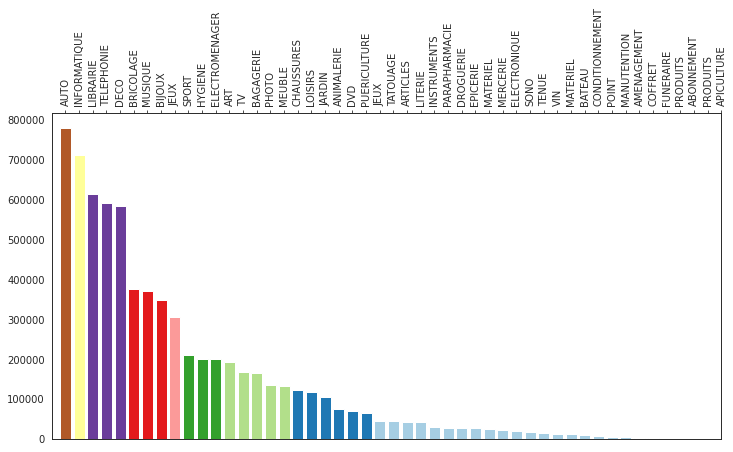

In [171]:
import seaborn as sns
import cv2 #opencv helpful for storing image as array

from matplotlib.colors import ListedColormap
from wordcloud import WordCloud

sns.set_style('white')
fig,ax = plt.subplots(1,figsize=(12,6))
pal = ListedColormap(sns.color_palette('Paired').as_hex())
colors = pal(np.interp(catlvl1,[catlvl1.min(),catlvl1.max()],[0,1]))
bars = ax.bar(range(1,len(catlvl1)+1),catlvl1,color=colors);
ax.set_xticks([]);
ax.set_xlim(0,len(catlvl1))
ax1 = plt.twiny(ax)
ax1.set_xlim(0,len(catlvl1))
ax1.set_xticks(range(1,len(abbriv)+1,1));
ax1.set_xticklabels(abbriv.values,rotation=90);


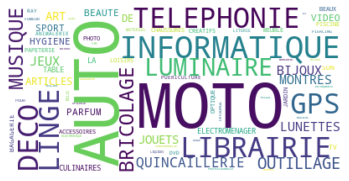

In [186]:
# Lets Create a word cloud for Category level 1
word_cloud = WordCloud(collocations = False, background_color = 'white')
word_cloud.generate(' '.join(train.iloc[:,3].values.flatten()))
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


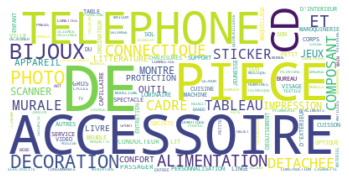

In [187]:
# Lets Create a word cloud for Category level 2
word_cloud = WordCloud(collocations = False, background_color = 'white')
word_cloud.generate(' '.join(train.iloc[:,4].values.flatten()))
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


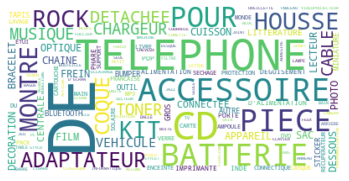

In [188]:
# Lets Create a word cloud for Category level 3
word_cloud = WordCloud(collocations = False, background_color = 'white')
word_cloud.generate(' '.join(train.iloc[:,5].values.flatten()))
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [ ]:
col_name=[ 'category_level1', 'category_level2', 'category_level3']
for 